In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
data = pd.read_csv('../data/latency_data.csv', sep=';') 

data.head()

,n,alpha,t_le,latency
0,3,0.0,20000,11.1690
1,3,0.0,20000,10.4225
2,3,0.0,20000,8.4923
3,3,0.0,20000,8.6147
4,3,0.0,20000,9.8063


In [44]:
data = data.groupby(['n', 'alpha', 't_le']).mean().reset_index()
data

,n,alpha,t_le,latency
0,3,0.0,20000,9.700960
1,3,0.1,20000,10.752180
2,3,0.5,20000,12.978960
3,3,1.0,20000,13.715200
4,5,0.0,20000,14.067780
5,5,0.1,20000,22.107760
6,5,0.5,20000,12.317320
7,5,1.0,20000,12.768860
8,10,0.0,20000,36.022180
9,10,0.1,20000,40.764180


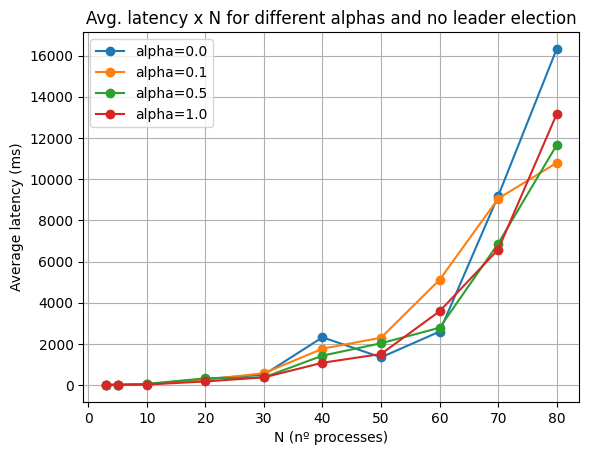

In [45]:
# Group the data by 'alfa' and plot a line for each group

filtered_data = data[data['t_le'] == 20000]
filtered_data = data[data['n'] <= 80]

for name, group in filtered_data.groupby('alpha'):
    # one decimal place
    name = round(name, 1)
    plt.plot(group['n'], group['latency'], label=f'alpha={name}', marker='o')

# Add labels and title
plt.xlabel('N (nº processes)')
plt.ylabel('Average latency (ms)')
plt.title('Avg. latency x N for different alphas and no leader election')

# Add a legend
plt.legend()

# Add grid lines
plt.grid(True)

# Show the plot
plt.show()

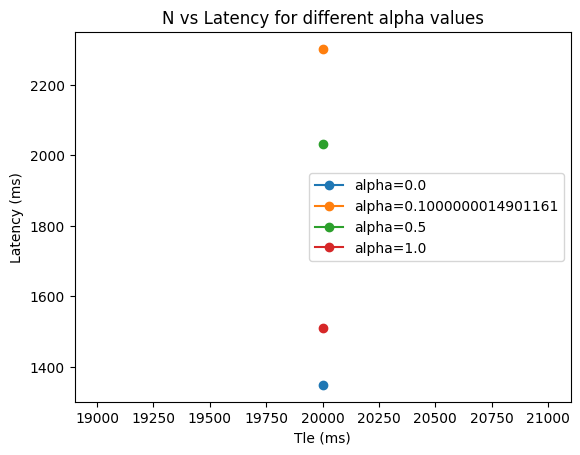

In [46]:
# Group the data by 'alfa' and plot a line for each group

filtered_data = data[data['n'].isin([50])]

for name, group in filtered_data.groupby('alpha'):
    plt.plot(group['t_le'], group['latency'], label=f'alpha={name}', marker='o')

# Add labels and title
plt.xlabel('Tle (ms)')
plt.ylabel('Latency (ms)')
plt.title('N vs Latency for different alpha values')

# Add a legend
plt.legend()

# Show the plot
plt.show()

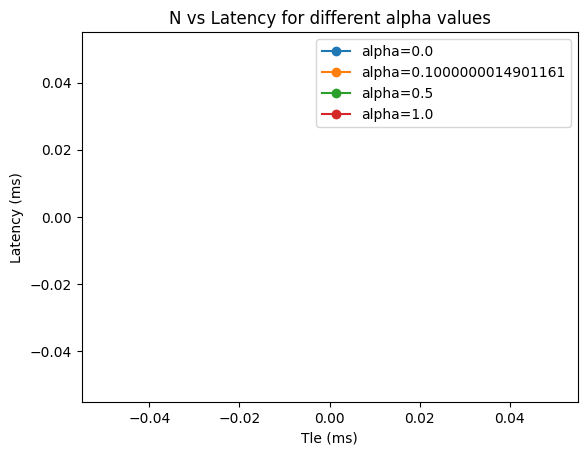

In [47]:
# Define the window size for the rolling average
window_size = 5

# Group the data by 'alpha' and plot a line for each group
filtered_data = data[data['n'].isin([50])]

for name, group in filtered_data.groupby('alpha'):
    # Calculate the rolling average
    group['latency'] = group['latency'].rolling(window_size).mean()
    plt.plot(group['t_le'], group['latency'], label=f'alpha={name}', marker='o')

# Add labels and title
plt.xlabel('Tle (ms)')
plt.ylabel('Latency (ms)')
plt.title('N vs Latency for different alpha values')

# Add a legend
plt.legend()

# Show the plot
plt.show()